<a href="https://colab.research.google.com/github/Vrushali9-collab/statsmodels-linear-regression/blob/main/SVMDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install autoviz

## **Support Vector MAchine**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/cell_samples.csv')

In [ ]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

## **Distribution of classes**

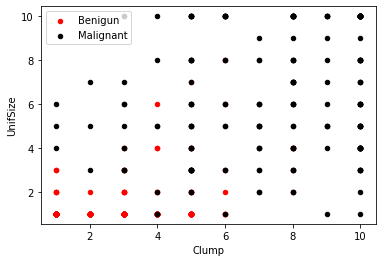

In [ ]:
benigun_df=df[df['Class']==2][0:200]
malignant_df=df[df['Class']==4][0:200]

axes=benigun_df.plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='Benigun')
malignant_df.plot(kind='scatter',x='Clump',y='UnifSize',color='black',label='Malignant',ax=axes)

## **Identify Unwanted Row**

In [ ]:

df=df[pd.to_numeric(df['BareNuc'],errors='coerce').notnull()]

df['BareNuc']=df['BareNuc'].astype('int')

df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [ ]:
df.columns

feature_df=df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize','BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

#cell of 100 rows and 11 col
#picked 9 col out of 11

#independent var
X=np.asarray(feature_df)

#dependent var
Y=np.asarray(df['Class'])

In [ ]:
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [ ]:
Y[0:5]

array([2, 2, 2, 2, 2])

## **Divide the data into train and test**

In [ ]:
#train(X,Y)
#test(X,Y)
#X is 2d array
#Y is 1d array
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=4)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(546, 9) (137, 9) (546,) (137,)


### **Generate graph for training data**

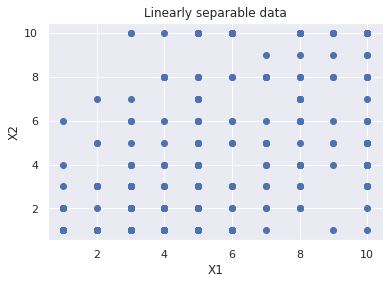

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1])
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
# Get support vector indices
support_vector_indices = Classifier.support_
print(support_vector_indices)

[ 12  17  27  33  52  53  68 156 183 196 253 313 366 374 378 491 494 512
 536   8  41  51  59  78  88 101 121 124 159 238 247 282 289 297 315 318
 347 435 488]


In [ ]:
# Get number of support vectors per class
support_vectors_per_class = Classifier.n_support_
print(support_vectors_per_class)

[19 20]


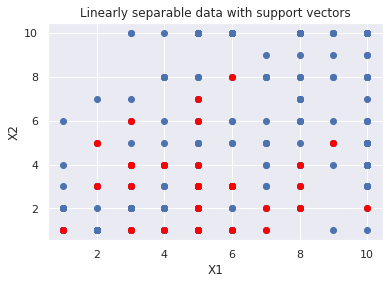

In [ ]:
# Get support vectors themselves
support_vectors = Classifier.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### **Building the model**

In [ ]:
from sklearn import svm
model=svm.SVC(kernel='linear',gamma='auto', C=2)
model.fit(X_train,Y_train)


SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_predict=model.predict(X_test)


### **Result**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,y_predict))


              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



### **Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_predict)

array([[85,  5],
       [ 0, 47]])

### **Graph**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


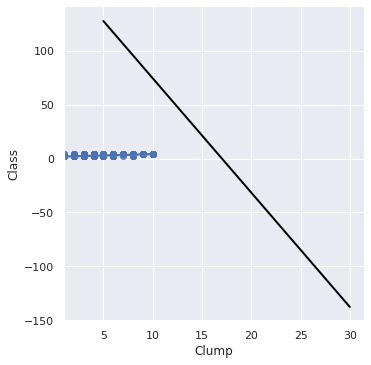

In [ ]:

# Create the hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(5,30)
yy = a * xx - (model.intercept_[0]) / w[1]


# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# Plot the hyperplane
sns.lmplot('Clump','Class', data=df)
plt.plot(xx, yy, linewidth=2, color='black')

